In [1]:
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt
from deepposekit.io import VideoReader, DataGenerator, initialize_dataset
from deepposekit.annotate import KMeansSampler
import tqdm
import glob
import pandas as pd


# Keypoints skeleton file

In [2]:
skeleton = pd.read_csv('dataset/skeleton.csv')
skeleton

,name,parent,swap
0,nose,NaN,NaN
1,head,nose,NaN
2,tail,head,NaN


# Initialize dataset for annotations from sampled images

In [3]:
videos = glob.glob('trimmed/*.mp4')
videos

['trimmed\\m1te1a4.mp4',
 'trimmed\\m2te1a4.mp4',
 'trimmed\\m3te1a4.mp4',
 'trimmed\\m4te1a4.mp4',
 'trimmed\\m5h1a3.mp4',
 'trimmed\\m5t1a3.mp4',
 'trimmed\\m5t2a3.mp4',
 'trimmed\\m5te1a3.mp4',
 'trimmed\\m5te2a3.mp4',
 'trimmed\\m6h1a3.mp4',
 'trimmed\\m6t1a3.mp4',
 'trimmed\\m6t2a3.mp4',
 'trimmed\\m6te1a3.mp4',
 'trimmed\\m6te2a3.mp4',
 'trimmed\\m7h1a3.mp4',
 'trimmed\\m7t1a3.mp4',
 'trimmed\\m7t2a3.mp4',
 'trimmed\\m7te1a3.mp4',
 'trimmed\\m7te2a3.mp4',
 'trimmed\\m8h1a3.mp4',
 'trimmed\\m8t1a3.mp4',
 'trimmed\\m8t2a3.mp4',
 'trimmed\\m8te1a3.mp4',
 'trimmed\\m8te2a3.mp4']

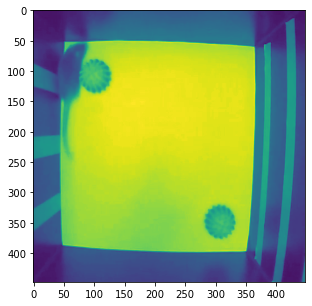

In [4]:
reader = VideoReader('trimmed/m1te1a4.mp4', gray=True)
frame = reader[0] # read a frame
reader.close()
frame.shape
plt.figure(figsize=(5,5))
plt.imshow(frame[0,...,0])
plt.show()

In [5]:


reader = VideoReader('trimmed/m1te1a4.mp4', batch_size=100, gray=True)

randomly_sampled_frames = []
for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    randomly_sampled_frames.append(random_sample)
reader.close()

reader = VideoReader('trimmed/m2te1a4.mp4', batch_size=100, gray=True)

for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    randomly_sampled_frames.append(random_sample)
reader.close()


reader = VideoReader('trimmed/m3te1a4.mp4', batch_size=100, gray=True)

for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    randomly_sampled_frames.append(random_sample)
reader.close()



reader = VideoReader('trimmed/m4te1a4.mp4', batch_size=100, gray=True)

for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    randomly_sampled_frames.append(random_sample)
reader.close()


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:07<00:00, 12.25it/s]


True

In [6]:
randomly_sampled_frames = np.concatenate(randomly_sampled_frames)
randomly_sampled_frames.shape

(3600, 448, 448, 1)

In [7]:
kmeans = KMeansSampler(n_clusters=36, max_iter=1000, n_init=10, batch_size=100, verbose=True)
kmeans.fit(randomly_sampled_frames)

C:\Users\Yixiong\Anaconda3\envs\deeppose\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  "MiniBatchKMeans is known to have a memory leak on "


Init 1/10 with method k-means++
Inertia for init 1/10: 17083790965.0
Init 2/10 with method k-means++
Inertia for init 2/10: 16165804195.0
Init 3/10 with method k-means++
Inertia for init 3/10: 15615503431.0
Init 4/10 with method k-means++
Inertia for init 4/10: 16241772217.0
Init 5/10 with method k-means++
Inertia for init 5/10: 16182213941.0
Init 6/10 with method k-means++
Inertia for init 6/10: 16597510609.0
Init 7/10 with method k-means++
Inertia for init 7/10: 15929894844.0
Init 8/10 with method k-means++
Inertia for init 8/10: 16262424585.0
Init 9/10 with method k-means++
Inertia for init 9/10: 15444768946.0
Init 10/10 with method k-means++
Inertia for init 10/10: 16657455425.0
[MiniBatchKMeans] Reassigning 7 cluster centers.
Minibatch step 1/36000: mean batch inertia: 47343536.7
Minibatch step 2/36000: mean batch inertia: 44920567.83032284, ewa inertia: 44920567.83032284
Minibatch step 3/36000: mean batch inertia: 37247595.65205481, ewa inertia: 44494409.97537877
Minibatch step 4

KMeansSampler(max_iter=1000, n_clusters=36, n_init=10, verbose=True)

In [ ]:
kmeans.plot_centers(n_rows=2)
plt.show()

In [8]:
kmeans_sampled_frames, kmeans_cluster_labels = kmeans.sample_data(randomly_sampled_frames, n_samples_per_label=10)
kmeans_sampled_frames.shape

(360, 448, 448, 1)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(kmeans_sampled_frames[0])
plt.show()

In [9]:
initialize_dataset(
    images=kmeans_sampled_frames,
    datapath='dataset/small_box_annotation_set.h5',
    skeleton='dataset/skeleton.csv',
    overwrite=True # This overwrites the existing datapath
)

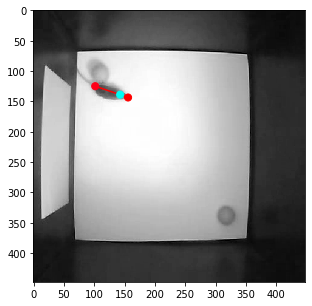

In [19]:
data_generator = DataGenerator('dataset/example_annotation_set.h5', mode="full")

image, keypoints = data_generator[0]

plt.figure(figsize=(5,5))
image = image[0] if image.shape[-1] is 3 else image[0, ..., 0]
cmap = None if image.shape[-1] is 3 else 'gray'
plt.imshow(image, cmap=cmap, interpolation='none')
for idx, jdx in enumerate(data_generator.graph):
    if jdx > -1:
        plt.plot(
            [keypoints[0, idx, 0], keypoints[0, jdx, 0]],
            [keypoints[0, idx, 1], keypoints[0, jdx, 1]],
            'r-'
        )
plt.scatter(keypoints[0, :, 0], keypoints[0, :, 1], c=np.arange(data_generator.keypoints_shape[0]), s=50, cmap=plt.cm.hsv, zorder=3)

plt.show()

## Merge additional files


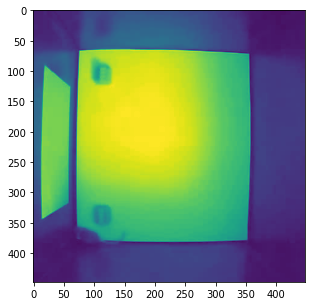

In [4]:
reader = VideoReader('dataset/m1t2.mp4', gray=True)
frame = reader[0] # read a frame
reader.close()
frame.shape
plt.figure(figsize=(5,5))
plt.imshow(frame[0,...,0])
plt.show()

In [5]:
reader = VideoReader('dataset/m1t2.mp4', batch_size=100, gray=True)

randomly_sampled_frames = []
for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    randomly_sampled_frames.append(random_sample)
reader.close()

randomly_sampled_frames = np.concatenate(randomly_sampled_frames)
randomly_sampled_frames.shape

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:27<00:00, 11.09it/s]


(3000, 448, 448, 1)

In [6]:
kmeans = KMeansSampler(n_clusters=10, max_iter=1000, n_init=10, batch_size=100, verbose=True)
kmeans.fit(randomly_sampled_frames)

C:\Users\Yixiong\Anaconda3\envs\deeppose\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  "MiniBatchKMeans is known to have a memory leak on "


Init 1/10 with method k-means++
Inertia for init 1/10: 3944835940.0
Init 2/10 with method k-means++
Inertia for init 2/10: 4251474432.0
Init 3/10 with method k-means++
Inertia for init 3/10: 4250798005.0
Init 4/10 with method k-means++
Inertia for init 4/10: 4039800594.0
Init 5/10 with method k-means++
Inertia for init 5/10: 4132313857.0
Init 6/10 with method k-means++
Inertia for init 6/10: 3895027432.0
Init 7/10 with method k-means++
Inertia for init 7/10: 4287830343.0
Init 8/10 with method k-means++
Inertia for init 8/10: 3958496325.0
Init 9/10 with method k-means++
Inertia for init 9/10: 4260447811.0
Init 10/10 with method k-means++
Inertia for init 10/10: 3954474467.0
[MiniBatchKMeans] Reassigning 1 cluster centers.
Minibatch step 1/30000: mean batch inertia: 13915225.12
[MiniBatchKMeans] Reassigning 2 cluster centers.
Minibatch step 2/30000: mean batch inertia: 11711249.848045772, ewa inertia: 11711249.848045772
Minibatch step 3/30000: mean batch inertia: 10378854.00300655, ewa i

Minibatch step 80/30000: mean batch inertia: 9430907.22851715, ewa inertia: 9560949.305692023
Minibatch step 81/30000: mean batch inertia: 9814896.681995953, ewa inertia: 9577873.489384387
Minibatch step 82/30000: mean batch inertia: 8244570.7730743345, ewa inertia: 9489016.26070661
Minibatch step 83/30000: mean batch inertia: 9595370.36001832, ewa inertia: 9496104.171357173
Minibatch step 84/30000: mean batch inertia: 8685961.666728783, ewa inertia: 9442112.668216327
Minibatch step 85/30000: mean batch inertia: 9746211.320065165, ewa inertia: 9462379.15617693
Minibatch step 86/30000: mean batch inertia: 9299695.881404249, ewa inertia: 9451537.218504643
Minibatch step 87/30000: mean batch inertia: 8873901.451543123, ewa inertia: 9413040.999446895
Minibatch step 88/30000: mean batch inertia: 9803793.299131924, ewa inertia: 9439082.47226829
Minibatch step 89/30000: mean batch inertia: 8565344.140511883, ewa inertia: 9380852.660088591
Minibatch step 90/30000: mean batch inertia: 9173752.0

KMeansSampler(max_iter=1000, n_init=10, verbose=True)

In [7]:
kmeans_sampled_frames, kmeans_cluster_labels = kmeans.sample_data(randomly_sampled_frames, n_samples_per_label=10)
kmeans_sampled_frames.shape

(100, 448, 448, 1)

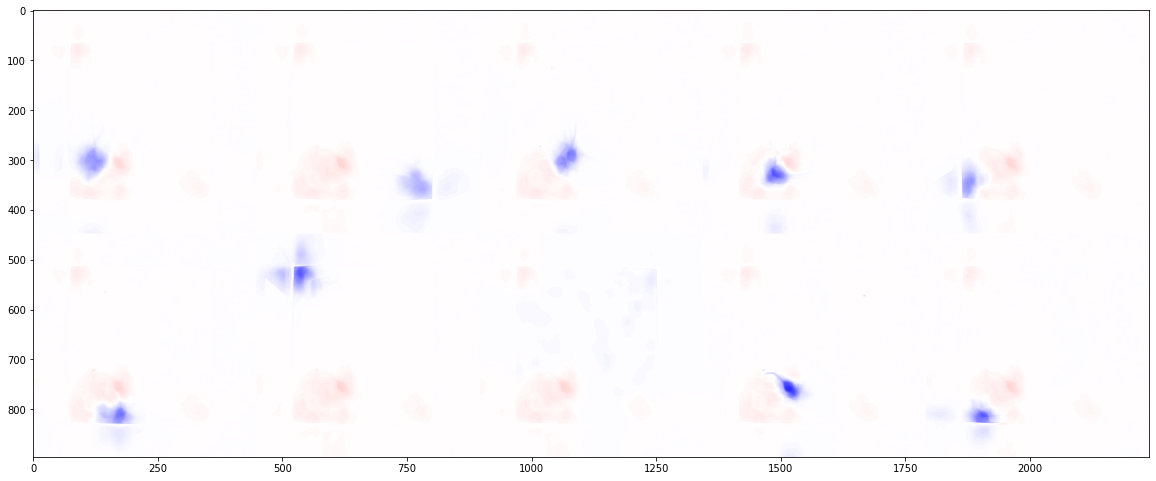

In [8]:
kmeans.plot_centers(n_rows=2)
plt.show()

In [17]:
from deepposekit.io.utils import merge_new_images

merge_new_images(
    datapath='dataset/annotation_merged.h5',
    merged_datapath='dataset/annotation_merged_2.h5',
    images=kmeans_sampled_frames,
    overwrite=True # This overwrites the merged dataset if it already exists
)

# Annotation

In [1]:
from deepposekit import Annotator

In [2]:
app = Annotator(datapath='dataset/small_box_annotation_set.h5',
                dataset='images',
                skeleton='dataset/skeleton.csv',
                shuffle_colors=False,
                text_scale=0.2)

C:\Users\Yixiong\Anaconda3\envs\deeppose\lib\site-packages\deepposekit\annotate\gui\Annotator.py:185: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.image_idx = np.sum(np.all(h5file["annotated"].value, axis=1)) - 1


In [3]:
app.run()

C:\Users\Yixiong\Anaconda3\envs\deeppose\lib\site-packages\deepposekit\annotate\gui\Annotator.py:199: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(self.datapath) as h5file:
C:\Users\Yixiong\Anaconda3\envs\deeppose\lib\site-packages\deepposekit\annotate\gui\Annotator.py:218: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(self.datapath) as h5file:


KeyboardInterrupt: 